In [83]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [86]:
dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.5)
X = dataset.data
y = dataset.target
target_names = dataset.target_names

In [87]:
images = dataset.images

In [88]:
n, h, w= images.shape

In [89]:
X.shape

(1140, 2914)

In [90]:
len(target_names)

5

In [91]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))

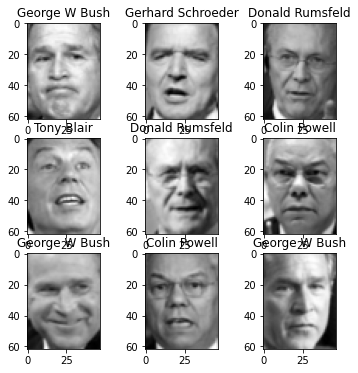

In [92]:

def plot_grid(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h, w), cmap="gray")
        plt.title(target_names[titles[i]])
plot_grid(X, y, h,w)

In [68]:
X.shape

(1140, 1850)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [94]:
X_train.shape

(1026, 2914)

In [96]:
p = PCA()
p.fit(X)

PCA()

In [97]:
p.transform(X).shape

(1140, 1140)

In [98]:
p.explained_variance_ratio_

array([1.8081576e-01, 1.5304321e-01, 7.2677597e-02, ..., 5.0074334e-07,
       4.6532051e-07, 1.9578542e-12], dtype=float32)

In [99]:
p1 = PCA(n_components=500, whiten=True)
p1.fit(X_train)

PCA(n_components=500, whiten=True)

In [100]:
X_train = p1.transform(X_train)
X_test = p1.transform(X_test)

In [106]:
clf = MLPClassifier(hidden_layer_sizes=(1024, ), batch_size=128, verbose=True, early_stopping=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 1.55410505
Validation score: 0.495146
Iteration 2, loss = 0.45589384
Validation score: 0.514563
Iteration 3, loss = 0.15871655
Validation score: 0.533981
Iteration 4, loss = 0.06826426
Validation score: 0.543689
Iteration 5, loss = 0.03711308
Validation score: 0.563107
Iteration 6, loss = 0.02489100
Validation score: 0.572816
Iteration 7, loss = 0.01850361
Validation score: 0.563107
Iteration 8, loss = 0.01495470
Validation score: 0.563107
Iteration 9, loss = 0.01258453
Validation score: 0.572816
Iteration 10, loss = 0.01090514
Validation score: 0.572816
Iteration 11, loss = 0.00963044
Validation score: 0.572816
Iteration 12, loss = 0.00860909
Validation score: 0.572816
Iteration 13, loss = 0.00775708
Validation score: 0.572816
Iteration 14, loss = 0.00705603
Validation score: 0.572816
Iteration 15, loss = 0.00645319
Validation score: 0.572816
Iteration 16, loss = 0.00593857
Validation score: 0.572816
Iteration 17, loss = 0.00548938
Validation score: 0.572816
Valida

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [107]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.93      0.59      0.72        22
  Donald Rumsfeld       1.00      0.36      0.53        11
    George W Bush       0.72      0.98      0.83        58
Gerhard Schroeder       0.88      0.58      0.70        12
       Tony Blair       0.89      0.73      0.80        11

         accuracy                           0.78       114
        macro avg       0.88      0.65      0.72       114
     weighted avg       0.82      0.78      0.77       114



In [123]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([214, 110, 472,  97, 133]))

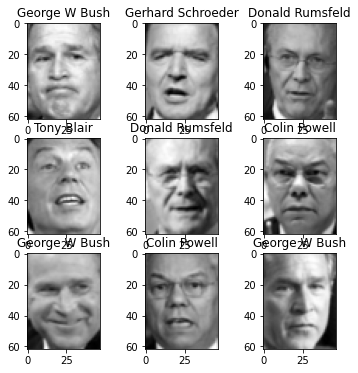

In [109]:
plot_grid(X, y, h,w)

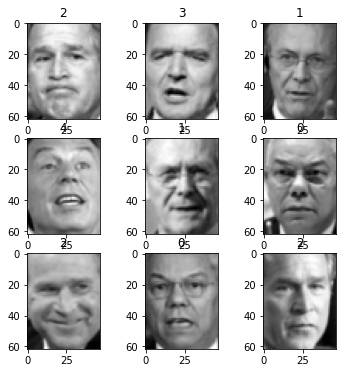

In [124]:
import matplotlib.pyplot as plt
def plot_grid(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h, w), cmap="gray")
        plt.title(titles[i])
plot_grid(X, y, h,w)

In [125]:
mean = np.mean(images, axis=0)
print(mean.shape)

(62, 47)


In [128]:
n_components=500
#pca_images = p1.components_.reshape((n_components ,h, w))

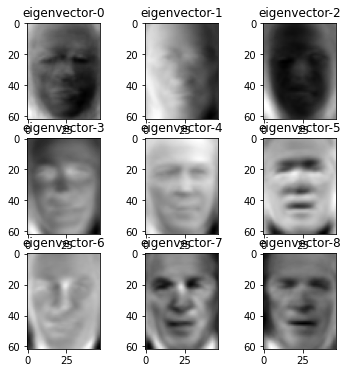

In [129]:
pca_tiles = [f"eigenvector-{i}" for i in range(len(p1.components_))]
plot_grid(pca_images, pca_tiles, h, w)